## DATA PREPARATION FOR CAR SALE COMPANY

In [454]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE,VarianceThreshold
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np


### Load Data

In [455]:
dataFrame = pd.read_csv('./carsales/Car_sales.csv')

## A1 : DATA CLEANING AND PREPROCESSING

In [456]:
dataFrame.drop_duplicates()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21500.0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2-2.2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28400.0,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,27000.0,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4.2012,85.230000
3,Acura,RL,8.588,29.725,Passenger,42000.0,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23990.0,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,V40,3.545,NaN,Passenger,24400.0,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27500.0,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28800.0,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45500.0,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [457]:
print("Before getting cleaned up")
print(dataFrame["Latest_Launch"][:3])

dataFrame["Latest_Launch"]= dataFrame["Latest_Launch"].replace('[^0-9]','/', regex=True)
print("After Getting Cleaned Up")
print(dataFrame["Latest_Launch"][:3])

Before getting cleaned up
0    2-2.2012
1    6/3/2011
2    1/4.2012
Name: Latest_Launch, dtype: object
After Getting Cleaned Up
0    2/2/2012
1    6/3/2011
2    1/4/2012
Name: Latest_Launch, dtype: object


## A2 : Cleaning a small dataset by handling missing values and outliers

#### Handling Missing Values

In [458]:
for column_name in dataFrame.columns:
    empty_cells_count = dataFrame[column_name].isna().sum()
    print(f"{column_name}': {empty_cells_count}")


Manufacturer': 7
Model': 0
Sales_in_thousands': 0
__year_resale_value': 36
Vehicle_type': 9
Price': 1
Engine_size': 1
Horsepower': 1
Wheelbase': 1
Width': 1
Length': 1
Curb_weight': 1
Fuel_capacity': 1
Fuel_efficiency': 1
Latest_Launch': 0
Power_perf_factor': 1


In [459]:
"""
We can see that there is a specific row that has many empty cells so we can agree to remove it 
let us remove a cell if the number of empty cells is greater than half the number of the columns in that exact row
"""
threshold = dataFrame.shape[1] // 2
countNumberOfEmptyCellInRow = dataFrame.isna().sum(axis = 1)
dataFrame = dataFrame[countNumberOfEmptyCellInRow < threshold]


In [460]:
""" 
Handling the missing values of the Manufacturer
we can observe that the manufacturerers are grouped so we could infer that the name of the manufacturer 
is gonna be the same as the one under it 
"""

dataFrame["Manufacturer"].bfill( inplace = True)
empty_cells_count = dataFrame["Manufacturer"].isna().sum()
print(f"Manufacturer: {empty_cells_count }")

Manufacturer: 0


In [461]:
""" 
for the Year resale value we won't know the exact numbers but our best guess is we can take the average of them
that it won't have that much effect
"""
mean = dataFrame['__year_resale_value'].mean()

dataFrame['__year_resale_value'].fillna(mean,inplace=True)
empty_cells_count = dataFrame['__year_resale_value'].isna().sum()
print(f"yearly resale value: {empty_cells_count }")

yearly resale value: 0


In [462]:
"""
For the Vehicle type we can observe from the data that Mode of the data set would make more sense since we only have two
variables.
"""
mode = dataFrame['Vehicle_type'].mode()[0]
dataFrame['Vehicle_type'].fillna(mode, inplace= True)
empty_cells_count = dataFrame['Vehicle_type'].isna().sum()
print(f" Vehicle_type: {empty_cells_count }")

 Vehicle_type: 0


In [463]:
"""
Now let us check if there are any empty values that are set
"""
for column_name in dataFrame.columns:
    empty_cells_count = dataFrame[column_name].isna().sum()
    print(f"{column_name}': {empty_cells_count}")

Manufacturer': 0
Model': 0
Sales_in_thousands': 0
__year_resale_value': 0
Vehicle_type': 0
Price': 0
Engine_size': 0
Horsepower': 0
Wheelbase': 0
Width': 0
Length': 0
Curb_weight': 0
Fuel_capacity': 0
Fuel_efficiency': 0
Latest_Launch': 0
Power_perf_factor': 0


### Now let us take care of the outliers
##### First let us determine what kind of an outlier we have by depicting the prices on a graph

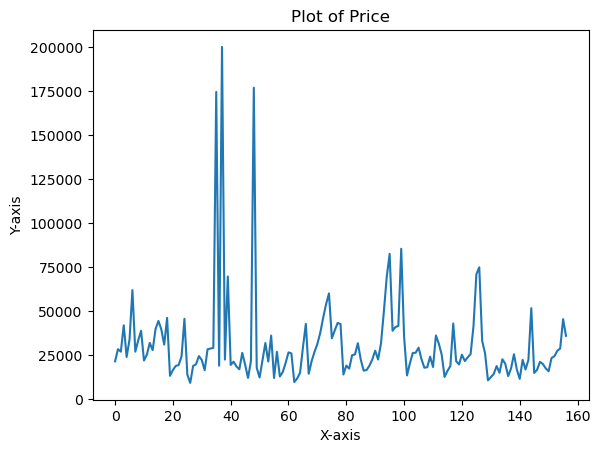

In [464]:

column_to_plot = 'Price'

dataFrame[column_to_plot].plot()

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Plot of {column_to_plot}')

plt.show()

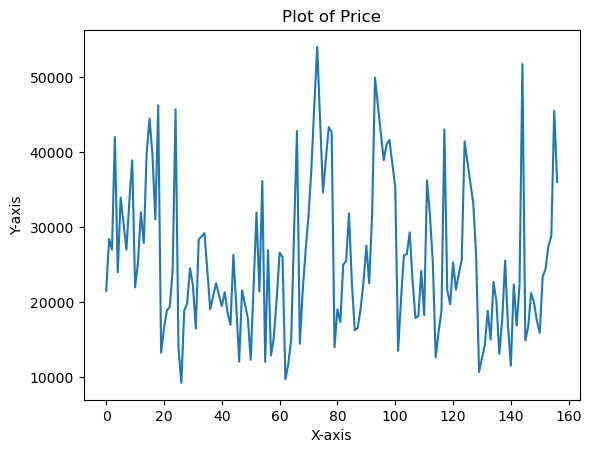

In [465]:
"""
We can see that we have some outliers so we need to take care of them
we are gonna use the Inter quartile range to take care of the outliers
Even though removing outlier will cause many effct we believe that the outlier in the price in thousands might have been caused
by a mistake in the dataset due to their exajurated value that is why we will remove them. 
"""
Column_being_checked_Outliers = "Price"

Q1 = dataFrame["Price"].quantile(0.25)
Q3 = dataFrame["Price"].quantile(0.75)

IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
Upper_fence = Q3 + 1.5 * IQR
outliers_mask = (dataFrame["Price"] < lower_fence) | (dataFrame["Price"] > Upper_fence)

dataFrame = dataFrame[~outliers_mask]
column_to_plot = 'Price'

dataFrame[column_to_plot].plot()

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Plot of {column_to_plot}')

plt.show()

## A3 : Normalization and Encoding

In [466]:
"""
Since our price column and the columns such as sales in thousands and year resale value are in different ranges
we are gonna bring them to the same 0 to 1 range f

"""


def Normalize(Column_Name):
    scaler = MinMaxScaler()
    column_data = dataFrame[Column_Name].values.reshape(-1, 1)
    print(Column_Name)
    print(column_data)
    normalized_data = scaler.fit_transform(column_data)
    print(normalized_data)
    dataFrame[Column_Name] = normalized_data
Normalize('Price')
Normalize('Sales_in_thousands')
Normalize('__year_resale_value')

# We will do the same for both 

Price
[[21500.]
 [28400.]
 [27000.]
 [42000.]
 [23990.]
 [33950.]
 [26990.]
 [33400.]
 [38900.]
 [21975.]
 [25300.]
 [31965.]
 [27885.]
 [39895.]
 [44475.]
 [39665.]
 [31010.]
 [46225.]
 [13260.]
 [16535.]
 [18890.]
 [19390.]
 [24340.]
 [45705.]
 [13960.]
 [ 9235.]
 [18890.]
 [19840.]
 [24495.]
 [22245.]
 [16480.]
 [28340.]
 [29185.]
 [19045.]
 [22505.]
 [19460.]
 [21315.]
 [18575.]
 [16980.]
 [26310.]
 [19565.]
 [12070.]
 [21560.]
 [17885.]
 [12315.]
 [22195.]
 [31930.]
 [21410.]
 [36135.]
 [12050.]
 [26935.]
 [12885.]
 [15350.]
 [20550.]
 [26600.]
 [26000.]
 [ 9699.]
 [11799.]
 [14999.]
 [29465.]
 [42800.]
 [14460.]
 [21620.]
 [26895.]
 [31505.]
 [37805.]
 [46305.]
 [54005.]
 [34605.]
 [39080.]
 [43330.]
 [42660.]
 [13987.]
 [19047.]
 [17357.]
 [24997.]
 [25450.]
 [31807.]
 [22527.]
 [16240.]
 [16540.]
 [19035.]
 [22605.]
 [27560.]
 [22510.]
 [31750.]
 [49900.]
 [38900.]
 [41000.]
 [41600.]
 [35300.]
 [13499.]
 [20390.]
 [26249.]
 [26399.]
 [29299.]
 [22799.]
 [17890.]
 [18145.]
 [24

## A.4: Advanced Feature Engineering and Selection Techniques

In [467]:
# Feature Engineering
dataFrame['Latest_Launch'] = pd.to_datetime(dataFrame['Latest_Launch'], errors='coerce')
dataFrame['Year'] = dataFrame['Latest_Launch'].dt.year
dataFrame['Month'] = dataFrame['Latest_Launch'].dt.month

##### Power_to_Weight_Ratio

In [468]:
'''
The power-to-weight ratio is a measure that evaluates the performance of a vehicle by comparing its engine power to its overall weight. 
A higher ratio suggests better acceleration and agility, often associated with high-performance vehicles, while a lower ratio indicate greater 
fuel efficiency but potentially slower acceleration. In your dataset, the "Power_perf_factor" column likely represents a factor related to power 
performance, possibly linked to the power-to-weight ratio.
'''
dataFrame['Power_to_Weight_Ratio'] = dataFrame['Horsepower'] / dataFrame['Curb_weight']
print(dataFrame['Power_to_Weight_Ratio'].describe())

count    145.000000
mean      53.211869
std       10.500444
min       29.023747
25%       45.764537
50%       51.874558
75%       57.273769
max      107.476636
Name: Power_to_Weight_Ratio, dtype: float64


#### Performance_Index

In [469]:
'''Performance_Index' provides a balanced assessment of a car's performance, taking into account factors related to power, efficiency, and weight. 
  The higher the 'Performance_Index', the better the overall performance of the car according to the specified criteria.'''
# Define weights for each feature
weight_horsepower = 0.4
weight_fuel_efficiency = 0.3
weight_power_perf_factor = 0.2
weight_engine_size = 0.05
weight_curb_weight = 0.05

# Calculate Performance_Index
dataFrame['Performance_Index'] = (
    weight_horsepower * dataFrame['Horsepower'] +
    weight_fuel_efficiency * dataFrame['Fuel_efficiency'] +
    weight_power_perf_factor * dataFrame['Power_perf_factor'] +
    weight_engine_size * dataFrame['Engine_size'] +
    weight_curb_weight * dataFrame['Curb_weight']
)
# Scale the values to the range [0, 100]
min_value = dataFrame['Performance_Index'].min()
max_value = dataFrame['Performance_Index'].max()
dataFrame['Performance_Index'] = 100 * (dataFrame['Performance_Index'] - min_value) / (max_value - min_value)
print(dataFrame['Performance_Index'].describe())

count    145.000000
mean      40.559796
std       17.220621
min        0.000000
25%       28.260123
50%       38.744327
75%       51.162689
max      100.000000
Name: Performance_Index, dtype: float64


##### Value_index

In [470]:
'''A higher "Value_Index" suggests that a car delivers better performance (higher horsepower), efficiency (better fuel efficiency), and 
value for money (lower price and curb weight). It provides a single, comprehensive measure that considers both performance and economic factors, 
aiding in the evaluation of a car's overall value proposition.
'''

dataFrame['Value_Index'] = (dataFrame['Horsepower'] * dataFrame['Fuel_efficiency']) / (dataFrame['Curb_weight'] * dataFrame['Price'])
replace_value = 1e10
dataFrame['Value_Index'].replace([np.inf, -np.inf], replace_value, inplace=True)
dataFrame['Value_Index'].clip(lower=-replace_value, upper=replace_value, inplace=True)
scaler = StandardScaler()
dataFrame['Value_Index'] = scaler.fit_transform(dataFrame['Value_Index'].values.reshape(-1, 1))
dataFrame['Value_Index'] = 50 * (dataFrame['Value_Index'] + 2)  # Assuming a roughly normal distribution
print(dataFrame['Value_Index'].describe())


count    145.000000
mean     100.000000
std       50.173311
min       95.832985
25%       95.833089
50%       95.833178
75%       95.833310
max      700.000000
Name: Value_Index, dtype: float64


In [471]:
print(dataFrame.head())

  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra            0.031102             0.308625    Passenger   
1        Acura       TL            0.072669             0.405484    Passenger   
2        Acura       CL            0.025912             0.360017    Passenger   
3        Acura       RL            0.015687             0.676908    Passenger   
4         Audi       A4            0.037537             0.471066    Passenger   

      Price  Engine_size  Horsepower  Wheelbase  Width  ...  Curb_weight  \
0  0.273956          1.8       140.0      101.2   67.3  ...        2.639   
1  0.428077          3.2       225.0      108.1   70.3  ...        3.517   
2  0.396806          3.2       225.0      106.9   70.6  ...        3.470   
3  0.731852          3.5       210.0      114.6   71.4  ...        3.850   
4  0.329573          1.8       150.0      102.6   68.2  ...        2.998   

   Fuel_capacity  Fuel_efficiency  Latest_Launch Power_p

### Feature Selection Techniques

#### Recursive Feature Elimination (RFE)

RFE Iteratively remove the least important features based on model performance until the desired number is reached.

In [472]:
dataFrame = dataFrame.dropna()  # Drop rows with missing values
# Assuming 'Latest_Launch' is a datetime column, convert it to numeric for modeling
dataFrame['Latest_Launch'] = pd.to_datetime(dataFrame['Latest_Launch']).astype(int) / 10**9
 
# Handle categorical variables (e.g., 'Manufacturer', 'Model', 'Vehicle_type')
le = LabelEncoder()
categorical_columns = ['Manufacturer', 'Model', 'Vehicle_type']
dataFrame[categorical_columns] = dataFrame[categorical_columns].apply(lambda col: le.fit_transform(col))
X = dataFrame.drop(['Sales_in_thousands'], axis=1) # Define features and target variable
y = dataFrame['Sales_in_thousands']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split the data into training and testing sets
imputer = SimpleImputer(strategy='mean') # Handle missing values in the test set using the mean of the training set
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model = RandomForestRegressor() 
num_features_to_select = 10  #we can set the desired number of fe
rfe = RFE(model, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the model with the selected features
model.fit(X_train_rfe, y_train)

# Make predictions on the test set
X_test_rfe = rfe.transform(X_test)
y_pred = model.predict(X_test_rfe)

mse = mean_squared_error(y_test, y_pred) # Evaluate the model
print(f'Mean Squared Error: {mse}')

selected_features = X.columns[rfe.support_]
print('Selected Features:', selected_features)


Mean Squared Error: 0.016254115035577492
Selected Features: Index(['Manufacturer', '__year_resale_value', 'Price', 'Wheelbase', 'Length',
       'Curb_weight', 'Power_perf_factor', 'Month', 'Power_to_Weight_Ratio',
       'Value_Index'],
      dtype='object')


####  Variance Thresholding 

Variance Thresholding remove features with low variance, as they may not provide much information.

In [473]:
threshold_value = 3 # Set the threshold value 
variance_threshold = VarianceThreshold(threshold=threshold_value)
X_train_high_variance = variance_threshold.fit_transform(X_train)
X_test_high_variance = variance_threshold.transform(X_test)

model = RandomForestRegressor()
model.fit(X_train_high_variance, y_train)
y_pred = model.predict(X_test_high_variance)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

selected_features = X.columns[variance_threshold.get_support()]
print('Selected Features after Variance Thresholding:', selected_features)


Mean Squared Error: 0.015653009212790312
Selected Features after Variance Thresholding: Index(['Manufacturer', 'Model', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Fuel_capacity', 'Fuel_efficiency', 'Latest_Launch',
       'Power_perf_factor', 'Month', 'Power_to_Weight_Ratio',
       'Performance_Index', 'Value_Index'],
      dtype='object')


 #### Least Absolute Shrinkage and Selection Operator (LASSO)

LASSO (Least Absolute Shrinkage and Selection Operator): Regularization technique that penalizes the absolute size of coefficients, often resulting in sparse feature selection.

In [474]:

alpha_value = 0.06  # Set the regularization strength (alpha)
lasso_model = Lasso(alpha=alpha_value)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model.fit(X_train, y_train)
selected_features = X.columns[lasso_model.coef_ != 0] # Get selected features (non-zero coefficients)

X_train_lasso = X_train[selected_features] # Apply feature selection to the training and test sets
X_test_lasso = X_test[selected_features]


model = RandomForestRegressor()
model.fit(X_train_lasso, y_train)
y_pred = model.predict(X_test_lasso)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print('Selected Features:', selected_features)


Mean Squared Error: 0.015287859454163744
Selected Features: Index(['Manufacturer', 'Model', 'Wheelbase', 'Length', 'Latest_Launch',
       'Power_perf_factor', 'Value_Index'],
      dtype='object')
